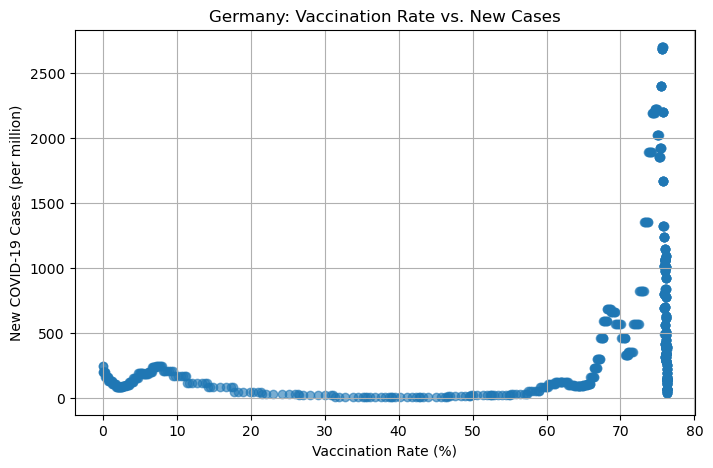

Pearson-Korrelation (Germany): 0.399
p-Wert: 0.00000
Korrelation & p-Wert je Land:
Germany: Corr = 0.399, p = 0.00000
Italy: Corr = 0.186, p = 0.00000
France: Corr = 0.225, p = 0.00000
Austria: Corr = 0.304, p = 0.00043


In [4]:
import pandas as pd

# URL zur OWID COVID-19 CSV-Datei
url = "https://covid.ourworldindata.org/data/owid-covid-data.csv"

# Daten laden
df = pd.read_csv(url)

# Zeige die ersten Zeilen an
df.head()

# Relevante Spalten auswählen
df = df[["location", "date", "people_fully_vaccinated_per_hundred", "new_cases_smoothed_per_million"]]

# Spalten umbenennen
df.columns = ["country", "date", "vaccination_rate", "new_cases"]

# Nur Länder auswählen (keine Kontinente oder Regionen)
df = df[~df["country"].isin(["World", "Europe", "Asia", "Africa", "South America", "North America", "Oceania"])]

# Zeige erneut die Daten
df.head()

import matplotlib.pyplot as plt

# Beispielsweise: Germany
country_name = "Germany"
country_data = df[df["country"] == country_name].dropna(subset=["vaccination_rate", "new_cases"])

# Scatterplot erstellen
plt.figure(figsize=(8, 5))
plt.scatter(country_data["vaccination_rate"], country_data["new_cases"], alpha=0.6)
plt.xlabel("Vaccination Rate (%)")
plt.ylabel("New COVID-19 Cases (per million)")
plt.title(f"{country_name}: Vaccination Rate vs. New Cases")
plt.grid(True)
plt.show()

from scipy.stats import pearsonr

# Pearson-Korrelation berechnen
corr, p_value = pearsonr(country_data["vaccination_rate"], country_data["new_cases"])

print(f"Pearson-Korrelation ({country_name}): {corr:.3f}")
print(f"p-Wert: {p_value:.5f}")

countries = ["Germany", "Switzerland", "Italy", "France", "Austria"]

print("Korrelation & p-Wert je Land:")
for country in countries:
    subset = df[df["country"] == country].dropna(subset=["vaccination_rate", "new_cases"])
    if len(subset) > 10:  # nur wenn genug Daten vorhanden
        corr, p = pearsonr(subset["vaccination_rate"], subset["new_cases"])
        print(f"{country}: Corr = {corr:.3f}, p = {p:.5f}")




